In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


In [2]:
results = pd.read_csv('Accuracies.csv')

In [3]:
results

,dataset_split,model,representation,accuracy
0,train: Reddit / test: Twitter,MultinomialNB,TF-IDF,0.667429
1,train: Twitter / test: Reddit,MultinomialNB,TF-IDF,0.800070
2,train/test 80/20 split,MultinomialNB,TF-IDF,0.810995
3,train: Reddit / test: Twitter,Logistic Regression,TF-IDF,0.737068
4,train: Reddit / test: Twitter,SVM,TF-IDF,0.730494
5,train: Twitter / test: Reddit,Logistic Regression,TF-IDF,0.792747
6,train: Twitter / test: Reddit,SVM,TF-IDF,0.802976
7,train/test 80/20 split,Logistic Regression,TF-IDF,0.866754
8,train/test 80/20 split,SVM,TF-IDF,0.881414
9,train: Reddit / test: Twitter,Logistic Regression,Doc2Vec,0.627036


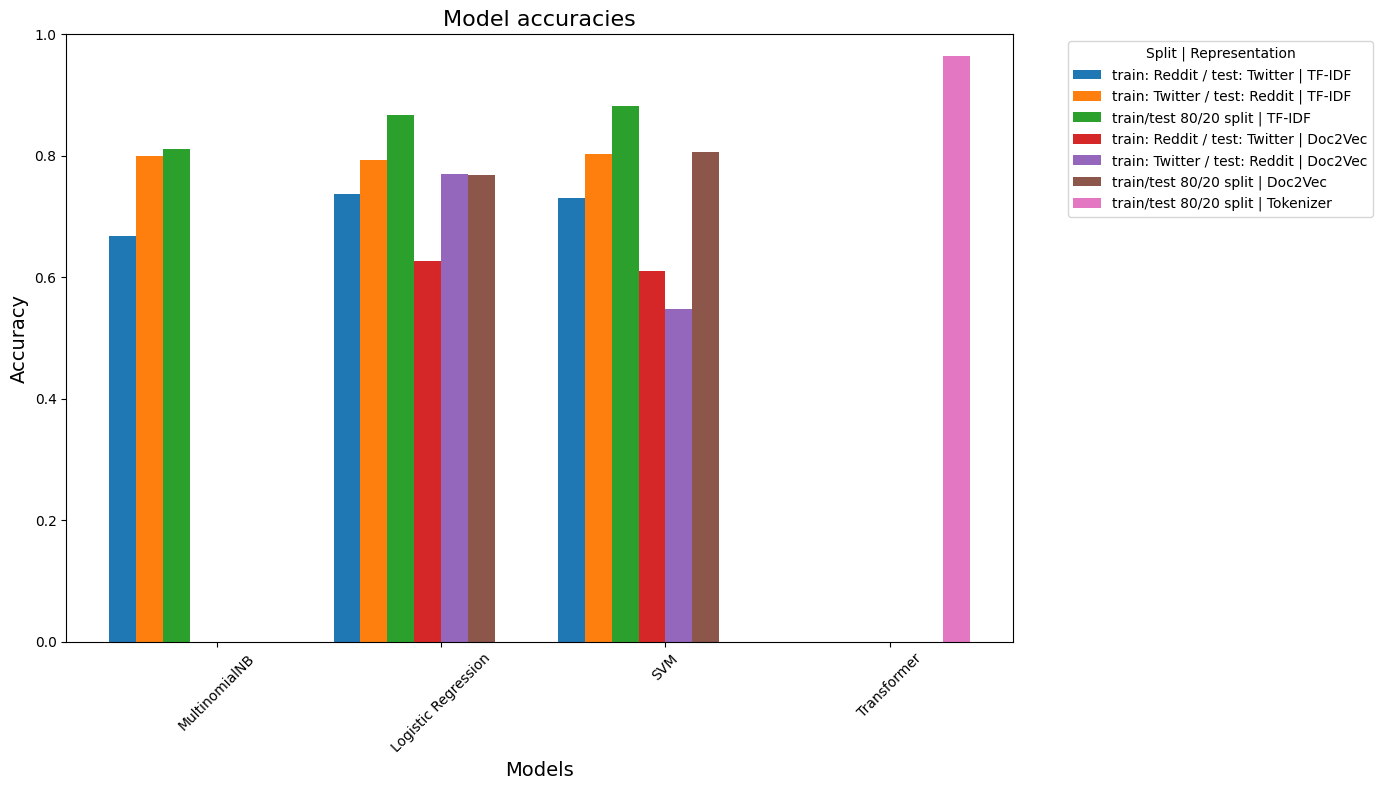

In [ ]:
# different colors for all combinations of splits and representations
results["group"] = results["dataset_split"] + " | " + results["representation"]

plt.figure(figsize=(14, 8))

models = results["model"].unique()
groups = results["group"].unique()

x = range(len(models))
bar_width = 0.12 

# plot bars for each group
for i, group in enumerate(groups):
    subset = results[results["group"] == group]
    # set correct position for each bar representing a group (empty group is empty in the figure)
    bar_positions = []
    for m in subset["model"]:
        # take in account model idex and group index
        bar_positions.append(list(models).index(m) + (i - len(groups)/2)*bar_width)
    plt.bar(bar_positions, subset["accuracy"], width=bar_width, label=group)

plt.xticks(range(len(models)), models, rotation=45)
plt.xlabel("Models", fontsize=14)
plt.ylabel("Accuracy", fontsize=14)
plt.title("Model accuracies", fontsize=16)
plt.ylim(0, 1)

# add explanation 
plt.legend(
    bbox_to_anchor=(1.05, 1),
    loc="upper left",
    title="Split | Representation"
)

plt.tight_layout()
plt.show()
